In [28]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

data_dir = '../../data/train_curated/'
output_dir = '../../data/traing_augmented/'

audio_file = '0afe72a0'

y, sr = sf.read(data_dir+audio_file+'.wav')
Audio(y, rate=sr)



In [54]:
#https://www.kaggle.com/huseinzol05/sound-augmentation-librosa
def change_pitch(y, sr, pitch_change, bins_per_octave = 12):
    print("pitch_change = ",pitch_change)
    y_pitch = librosa.effects.pitch_shift(y.astype('float64'), sr, n_steps=pitch_change, bins_per_octave=bins_per_octave)
    return y_pitch

def change_speed(y, sr, speed_change):
    print("speed_change = ",speed_change)
    tmp = librosa.effects.time_stretch(y.astype('float64'), speed_change)
    
    return tmp

def add_noise(y, sr, sigma):
    return  y + np.random.normal(0.0, sigma, y.shape)

def combine(y1, y1_mul, y2, y2_mul):
    max_len = max(y1.shape[0], y2.shape[0])
    #extend shorter recording
    if(y1.shape[0]<max_len):
        tmp_y1 = np.concatenate((y1,np.zeros(max_len-y1.shape[0])))
    else:
        tmp_y1 = y1
        
    if(y2.shape[0]<max_len):
        tmp_y2 = np.concatenate((y2,np.zeros(max_len-y2.shape[0])))
    else:
        tmp_y2 = y2
    return y1_mul*tmp_y1 + y2_mul*tmp_y2

def shift(y, sr, shift_sec, sigma=0.0005):
    shift_samples = shift_sec*sr
    if(shift_samples > 0):
        return np.concatenate((y, np.random.normal(0.0, sigma, np.abs(shift_samples))))
    if(shift_samples < 0):
        return np.concatenate((np.random.normal(0.0, sigma, np.abs(shift_samples)),y))

#different filters

#low pass

#high pass

#band pass
    
def get_spectrogram(y, sr, n_fft=1024):
    return librosa.amplitude_to_db(np.abs(librosa.core.stft(y, n_fft=n_fft, hop_length=int(0.75*n_fft))),ref=1.0)
    

In [3]:
y_pitch_changed = change_pitch(y,sr,2.5)
Audio(data=y_pitch_changed, rate=sr)

pitch_change =  2.5


In [4]:
y_speed_changed = change_speed(y_pitch_changed,sr,3)
Audio(data=y_speed_changed, rate=sr)


speed_change =  3


In [5]:
y_noisy = add_noise(y, sr, 0.01)
Audio(data=y_noisy, rate=sr)

In [9]:
combined = combine(y, 0.0, y_speed_changed, 0.9)
Audio(data=combined, rate=sr)

In [20]:
shifted = shift(y, sr, 2)
Audio(data=shifted, rate=sr)

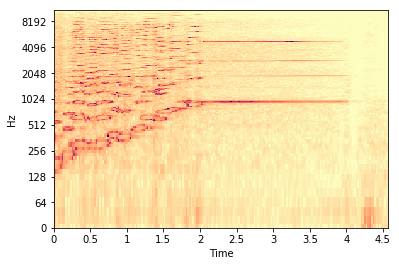

In [43]:
D = get_spectrogram(y_pitch_changed, sr, n_fft=1024)
librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max),y_axis='log', x_axis='time')

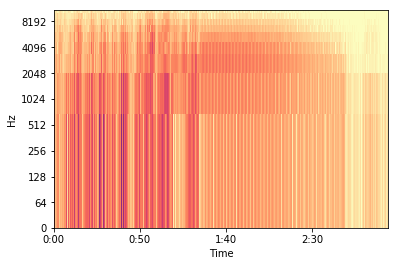

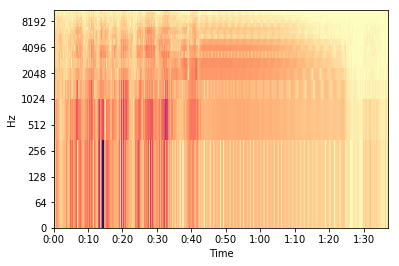

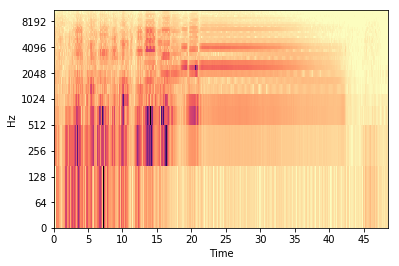

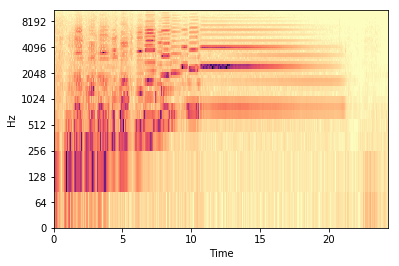

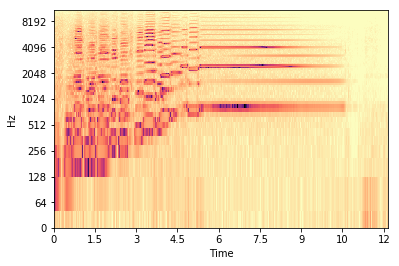

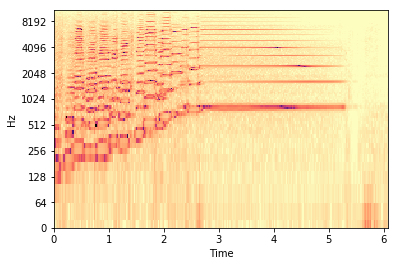

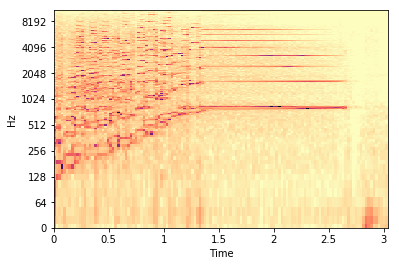

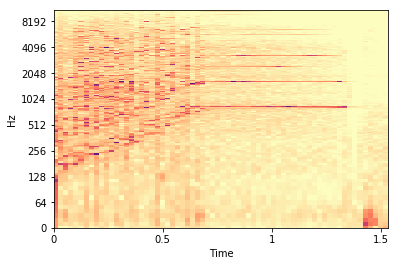

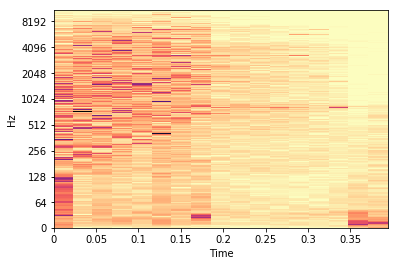

In [55]:
for i in [16,32,64,128,256,512,1024,2048,8192]:
    plt.figure()
    D = get_spectrogram(y, sr, n_fft=i)
    librosa.display.specshow(librosa.amplitude_to_db(D,ref=np.max),y_axis='log', x_axis='time')